In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"deniandriansyah","key":"6e24048825abd4d38091415d31e66904"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d ulrikthygepedersen/fastfood-nutrition

  0% 0.00/11.8k [00:00<?, ?B/s]
100% 11.8k/11.8k [00:00<00:00, 20.6MB/s]


In [ ]:
!mkdir fastfood-nutrition
!unzip fastfood-nutrition.zip -d fastfood-nutrition
!ls fastfood-nutrition

Archive:  fastfood-nutrition.zip
  inflating: fastfood-nutrition/fastfood.csv  
fastfood.csv


In [ ]:
df = pd.read_csv('/content/fastfood-nutrition/fastfood.csv')

In [ ]:
df.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


In [ ]:
df.tail()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
510,Taco Bell,Spicy Triple Double Crunchwrap,780,340,38,10.0,0.5,50,1850,87,9.0,8,23.0,20.0,10.0,25.0,Other
511,Taco Bell,Express Taco Salad w/ Chips,580,260,29,9.0,1.0,60,1270,59,8.0,7,23.0,NaN,NaN,NaN,Other
512,Taco Bell,Fiesta Taco Salad-Beef,780,380,42,10.0,1.0,60,1340,74,11.0,7,26.0,NaN,NaN,NaN,Other
513,Taco Bell,Fiesta Taco Salad-Chicken,720,320,35,7.0,0.0,70,1260,70,8.0,8,32.0,NaN,NaN,NaN,Other
514,Taco Bell,Fiesta Taco Salad-Steak,720,320,36,8.0,1.0,55,1340,70,8.0,8,28.0,NaN,NaN,NaN,Other


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 510
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   restaurant   301 non-null    object 
 1   item         301 non-null    object 
 2   calories     301 non-null    int64  
 3   cal_fat      301 non-null    int64  
 4   total_fat    301 non-null    int64  
 5   sat_fat      301 non-null    float64
 6   trans_fat    301 non-null    float64
 7   cholesterol  301 non-null    int64  
 8   sodium       301 non-null    int64  
 9   total_carb   301 non-null    int64  
 10  fiber        301 non-null    float64
 11  sugar        301 non-null    int64  
 12  protein      301 non-null    float64
 13  vit_a        301 non-null    float64
 14  vit_c        301 non-null    float64
 15  calcium      301 non-null    float64
 16  salad        301 non-null    object 
dtypes: float64(7), int64(7), object(3)
memory usage: 42.3+ KB


<Axes: >

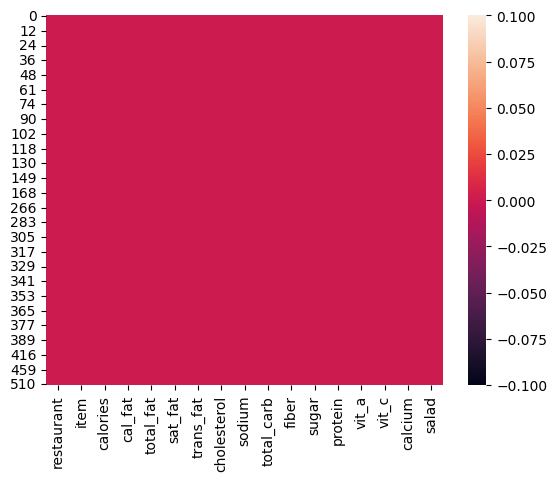

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.describe()

,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,537.009967,229.501661,25.554817,7.848837,0.455150,75.232558,1273.920266,47.534884,4.196013,8.176080,30.186047,18.857143,20.122924,24.976744
std,298.238769,168.098793,18.591248,6.190684,0.787707,54.812825,724.823252,27.555573,3.052559,7.548878,18.481485,31.384330,30.723957,25.643117
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,340.000000,120.000000,13.000000,4.000000,0.000000,40.000000,830.000000,30.000000,2.000000,4.000000,18.000000,4.000000,4.000000,8.000000
50%,490.000000,200.000000,22.000000,7.000000,0.000000,65.000000,1120.000000,44.000000,4.000000,7.000000,28.000000,10.000000,10.000000,20.000000
75%,680.000000,310.000000,34.000000,10.000000,1.000000,95.000000,1550.000000,61.000000,5.000000,10.000000,37.000000,20.000000,30.000000,35.000000
max,2430.000000,1270.000000,141.000000,36.000000,4.000000,475.000000,6080.000000,156.000000,16.000000,87.000000,186.000000,180.000000,400.000000,290.000000


In [ ]:
df['restaurant'].value_counts()

Subway         96
Mcdonalds      57
Sonic          49
Dairy Queen    27
Taco Bell      26
Arbys          25
Chick Fil-A    21
Name: restaurant, dtype: int64

In [ ]:
df['item'].value_counts()

Crispy Chicken Sandwich                     2
Grilled Chicken Sandwich                    2
Corn Dog                                    2
Footlong Italian Hero                       1
6" Italian Hero                             1
                                           ..
Veggie Burger With Mustard                  1
Veggie Burger W/ Ketchup                    1
Super Sonic Jalapeno Double Cheeseburger    1
Super Sonic Double Cheeseburger W/ Mayo     1
Spicy Triple Double Crunchwrap              1
Name: item, Length: 298, dtype: int64

<ipython-input-15-ee535b2cc5be>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

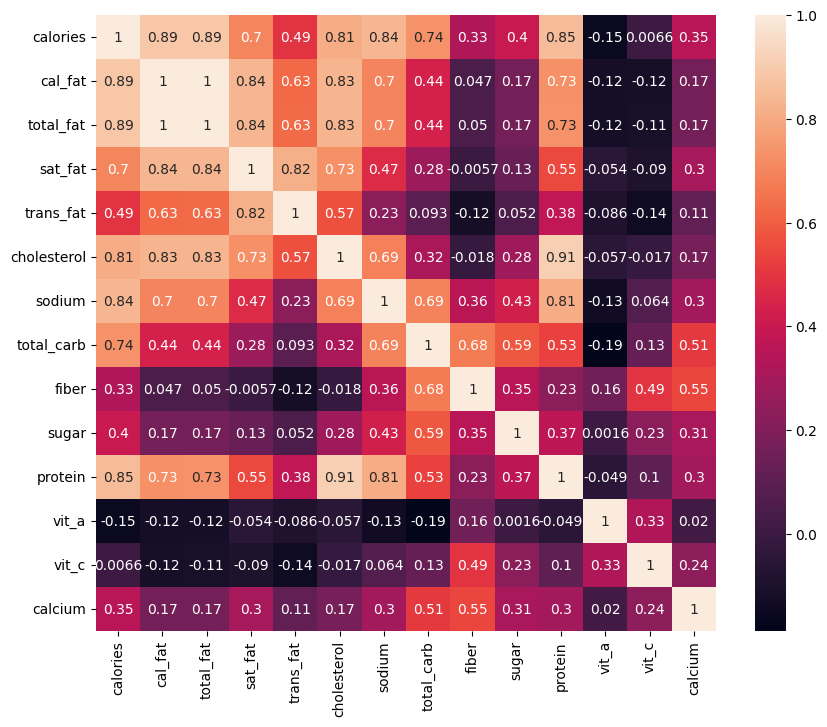

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

<Axes: title={'center': 'Chick Fil-A Calorie Per Item'}, xlabel='calories', ylabel='item'>

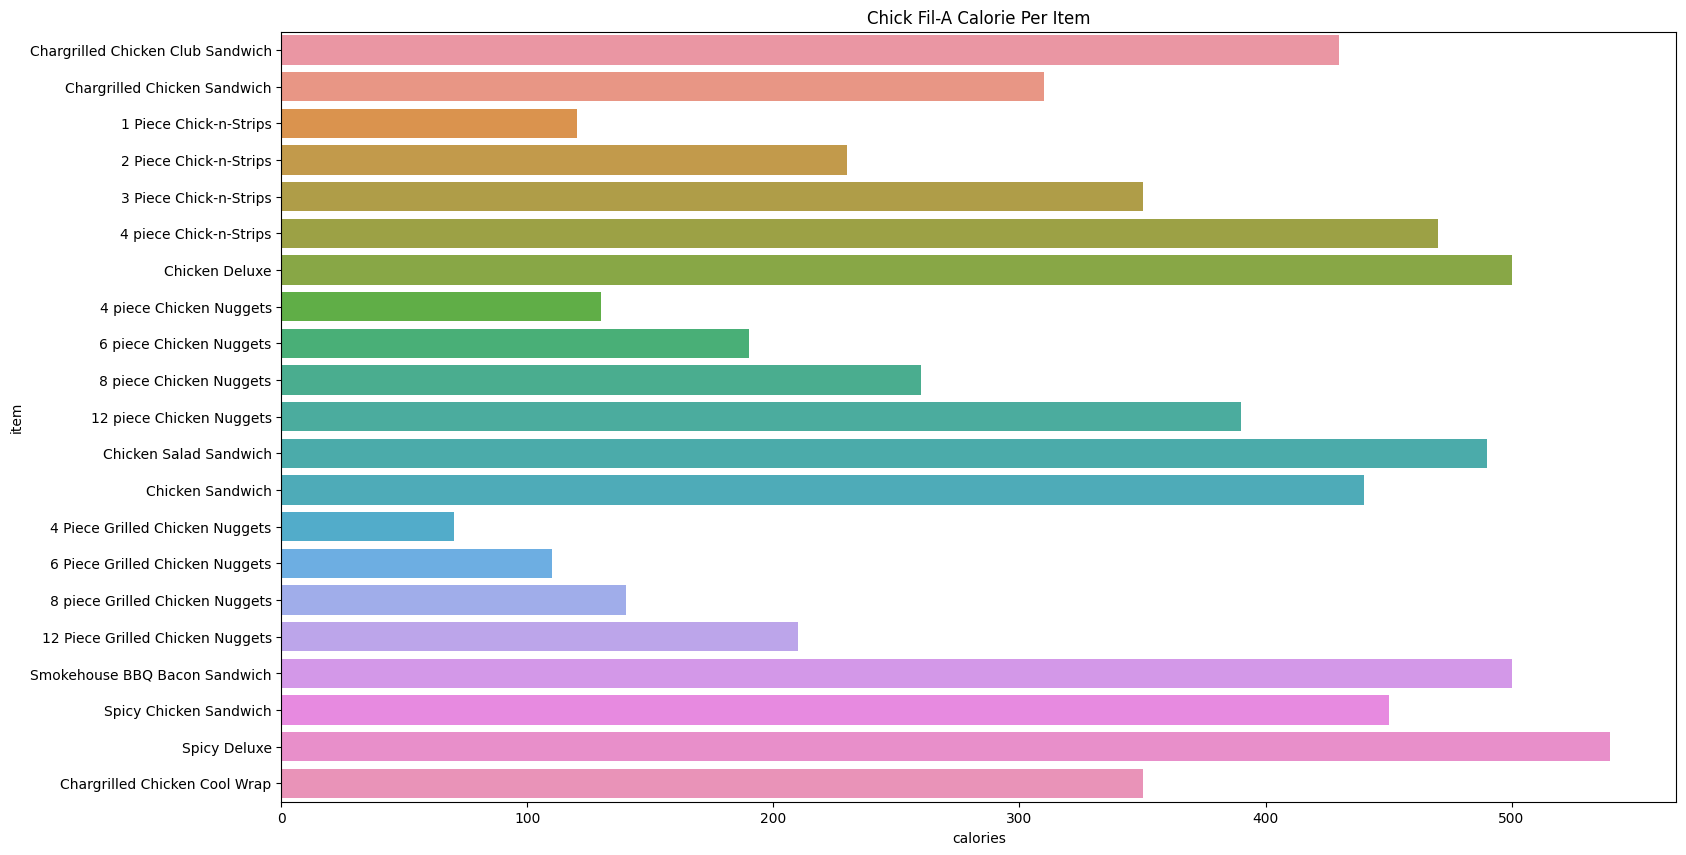

In [ ]:
chick_fila = df[df['restaurant'] == 'Chick Fil-A']
plt.figure(figsize=(18, 10))
plt.title('Chick Fil-A Calorie Per Item')
sns.barplot(y=chick_fila['item'], x=df['calories'])

In [ ]:
features = ['fiber', 'total_carb', 'sodium', 'cal_fat', 'total_fat', 'sat_fat', 'protein', 'sugar']
x=df[features]
y=df['calories']
x.shape, y.shape

((301, 8), (301,))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(76,)

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)

In [ ]:
score = lr.score(x_test, y_test)
print('akurasi model regresi linier =', score)

akurasi model regresi linier = 0.991859361417439


In [ ]:
# fiber =3.0 total_carb =44 sodium =1110 cal_fat=60 total_fat =7 sat_fat =2.0 protein =37.0 sugar =11
input_data = np.array([[3.0,44,1110,60,7,2.0,37.0,11]])

prediction = lr.predict(input_data)
print('Estimasi kalori pada makanan cepat saji :', prediction)

Estimasi kalori pada makanan cepat saji : [402.15587709]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
lr.fit(x_train, y_train)
y_train_prediction = lr.predict(x_train)

In [ ]:
r_squared = r2_score(y_train, y_train_prediction)
print(f"R-squared : {r_squared}")

R-squared : 0.9525584382039234


In [ ]:
import pickle

filename = 'estimasi_kalori.sav'
pickle.dump(lr,open(filename,'wb'))